## Setup

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [3]:
# the data is from https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/code

## Data Wrangling

##### Data collection

In [4]:
movies_df = pd.read_csv('Data/movies_metadata.csv', low_memory=False)

In [5]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


##### Data cleaning

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
movies_df.sample(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19187,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,45945,tt0079773,en,Radio On,"Set in 1970s Britain, a man drives from London...",...,1979-11-30,0.0,104.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,Radio On,False,5.0,1.0
17834,False,NaN,0,"[{'id': 10402, 'name': 'Music'}]",NaN,106825,tt0039634,en,Mother Wore Tights,"In this chronicle of a vaudeville family, Myrt...",...,1947-08-20,0.0,107.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,In our family dad wore the pants but . . . Mot...,Mother Wore Tights,False,0.0,0.0
43288,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,426230,tt5816374,en,Band Aid,A couple who can't stop fighting embark on a l...,...,2017-06-02,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Band Aid,False,6.5,25.0
40956,False,NaN,0,[],NaN,86172,tt1018706,pt,Cão Sem Dono,"In Porto Alegre, the unemployed Ciro has a dul...",...,2007-05-11,0.0,82.0,"[{'iso_639_1': 'pt', 'name': 'Português'}]",Released,NaN,Stray Dog,False,0.0,0.0
1808,False,NaN,140000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,95,tt0120591,en,Armageddon,When an asteroid threatens to collide with Ear...,...,1998-07-01,553799566.0,151.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Earth's Darkest Day Will Be Man's Finest Hour,Armageddon,False,6.5,2540.0


In [8]:
columns_to_drop = ['belongs_to_collection', 'homepage', 'poster_path', 'video', 'spoken_languages']
movies_df.drop(columns=columns_to_drop, inplace=True)

In [9]:
import ast
# change from str to dict
movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)

In [10]:
movies_df['production_companies'] = movies_df['production_companies'].fillna('[]')
movies_df['production_companies'] = movies_df['production_companies'].apply(ast.literal_eval)

In [11]:
movies_df['production_countries'] = movies_df['production_countries'].fillna('[]')
movies_df['production_countries'] = movies_df['production_countries'].apply(ast.literal_eval)

In [12]:
def extract_names_from_dicts(dict_list):
    if isinstance(dict_list, list):
        if dict_list: 
            return [obj['name'] for obj in dict_list]
    return []

In [13]:
movies_df['genres'] = movies_df['genres'].apply(extract_names_from_dicts)

In [14]:
movies_df['production_companies'] = movies_df['production_companies'].apply(extract_names_from_dicts)

In [15]:
movies_df['production_countries'] = movies_df['production_countries'].apply(extract_names_from_dicts)

In [16]:
movies_df.sample(5)

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
22718,False,60000000,"[Adventure, Animation, Comedy, Family, Fantasy]",137106,tt1490017,en,The Lego Movie,"An ordinary Lego mini-figure, mistakenly thoug...",16.418133,"[Village Roadshow Pictures, DC Comics, Vertigo...",[United States of America],2014-02-06,469160692.0,100.0,Released,The story of a nobody who saved everybody.,The Lego Movie,7.5,3127.0
19812,False,0,"[Comedy, Drama, Fantasy]",135718,tt2283748,hi,OMG: Oh My God!,A shopkeeper takes God to court when his shop ...,2.960593,[],[India],2012-09-28,0.0,125.0,Released,A Divine Comedy!,OMG: Oh My God!,7.1,42.0
30261,False,0,[Comedy],329243,tt1865333,en,Comedy Central Roast of Donald Trump,It's Donald Trump's turn to step in to the cel...,1.456319,[Comedy Central],[United States of America],2011-03-15,0.0,65.0,Released,NaN,Comedy Central Roast of Donald Trump,6.2,15.0
27213,False,0,"[Thriller, Drama]",29113,tt0039973,en,The Web,"Leopold Kroner, formerly of Colby Enterprises,...",1.250236,[Universal International Pictures (UI)],[United States of America],1947-05-25,0.0,87.0,Released,NaN,The Web,5.6,8.0
8405,False,0,[Drama],36612,tt0034828,en,The Hard Way,"An ambitious woman doesn""t care who she hurts ...",0.709005,[Warner Bros.],[United States of America],1943-02-20,0.0,109.0,Released,There are two sides to every story -- and ever...,The Hard Way,7.3,4.0


In [17]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45466 non-null  object 
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45461 non-null  object 
 9   production_companies  45466 non-null  object 
 10  production_countries  45466 non-null  object 
 11  release_date          45379 non-null  object 
 12  revenue               45460 non-null  float64
 13  runtime               45203 non-null  float64
 14  status                45379 non-null  object 
 15  tagline            

In [18]:
movies_df['popularity'].unique()

array(['21.946943', '17.015539', '11.7129', ..., '0.903007', '0.003503',
       '0.163015'], dtype=object)

In [19]:
movies_df['popularity'] = pd.to_numeric(movies_df['popularity'], errors='coerce')
movies_df['popularity'] = movies_df['popularity'].fillna(0)
movies_df['popularity'] = movies_df['popularity'].astype('float64')

In [20]:
movies_df['budget'].unique()

array(['30000000', '65000000', '0', ..., '3417000', '25868826', '1254040'],
      dtype=object)

In [21]:
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')

In [22]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  object 
 1   budget                45463 non-null  float64
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45466 non-null  float64
 9   production_companies  45466 non-null  object 
 10  production_countries  45466 non-null  object 
 11  release_date          45379 non-null  object 
 12  revenue               45460 non-null  float64
 13  runtime               45203 non-null  float64
 14  status                45379 non-null  object 
 15  tagline            

In [23]:
movies_df['status'].value_counts()

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

In [24]:
movies_df['adult'].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [25]:
weird_data = movies_df['adult'].isin([' - Written by Ørnås',
                                              ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
                                              ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'])
movies_df.loc[weird_data, 'adult'] = 'False'
movies_df['adult'] = movies_df['adult'].map({'True': 1, 'False': 0})

In [26]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45466 non-null  int64  
 1   budget                45463 non-null  float64
 2   genres                45466 non-null  object 
 3   id                    45466 non-null  object 
 4   imdb_id               45449 non-null  object 
 5   original_language     45455 non-null  object 
 6   original_title        45466 non-null  object 
 7   overview              44512 non-null  object 
 8   popularity            45466 non-null  float64
 9   production_companies  45466 non-null  object 
 10  production_countries  45466 non-null  object 
 11  release_date          45379 non-null  object 
 12  revenue               45460 non-null  float64
 13  runtime               45203 non-null  float64
 14  status                45379 non-null  object 
 15  tagline            

In [27]:
movies_df = movies_df.explode('genres')

In [28]:
movies_df = movies_df.explode('production_companies')

In [29]:
movies_df = movies_df.explode('production_countries')

In [30]:
movies_df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,0,30000000.0,Animation,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
0,0,30000000.0,Comedy,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
0,0,30000000.0,Family,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,7.7,5415.0
1,0,65000000.0,Adventure,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,TriStar Pictures,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
1,0,65000000.0,Adventure,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,Teitler Film,United States of America,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0


##### Duplicate values

In [31]:
duplicate_rows = movies_df[movies_df.duplicated()]

##### Missing data

In [32]:
movies_df.isnull().sum()

adult                        0
budget                      12
genres                    2861
id                           0
imdb_id                     50
original_language           54
original_title               0
overview                  2244
popularity                   0
production_companies     22498
production_countries     10389
release_date               148
revenue                     21
runtime                    518
status                     155
tagline                 112726
title                       21
vote_average                21
vote_count                  21
dtype: int64

In [33]:
movies_df.drop(columns=['id', 'imdb_id', 'overview', 'tagline'], inplace=True)

In [34]:
nan_columns_to_drop = ['production_companies', 'production_countries', 'release_date']
movies_df.dropna(subset=nan_columns_to_drop, inplace=True)

In [35]:
movies_df.isnull().sum()

adult                     0
budget                    0
genres                  636
original_language        49
original_title            0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                 270
status                    5
title                     0
vote_average              0
vote_count                0
dtype: int64

In [36]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237561 entries, 0 to 45464
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   adult                 237561 non-null  int64  
 1   budget                237561 non-null  float64
 2   genres                236925 non-null  object 
 3   original_language     237512 non-null  object 
 4   original_title        237561 non-null  object 
 5   popularity            237561 non-null  float64
 6   production_companies  237561 non-null  object 
 7   production_countries  237561 non-null  object 
 8   release_date          237561 non-null  object 
 9   revenue               237561 non-null  float64
 10  runtime               237291 non-null  float64
 11  status                237556 non-null  object 
 12  title                 237561 non-null  object 
 13  vote_average          237561 non-null  float64
 14  vote_count            237561 non-null  float64
dtypes: flo

##### Where does this go

In [37]:
movies_df.describe()

,adult,budget,popularity,revenue,runtime,vote_average,vote_count
count,237561.000000,2.375610e+05,237561.000000,2.375610e+05,237291.000000,237561.000000,237561.000000
mean,0.000046,1.386919e+07,5.824644,3.285815e+07,105.014038,6.003418,321.897323
std,0.006805,3.194460e+07,9.299608,1.094790e+08,29.376298,1.360009,871.866384
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,1.148314,0.000000e+00,91.000000,5.500000,10.000000
50%,0.000000,0.000000e+00,3.874490,0.000000e+00,102.000000,6.200000,38.000000
75%,0.000000,1.200000e+07,8.503483,8.109160e+06,116.000000,6.800000,207.000000
max,1.000000,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


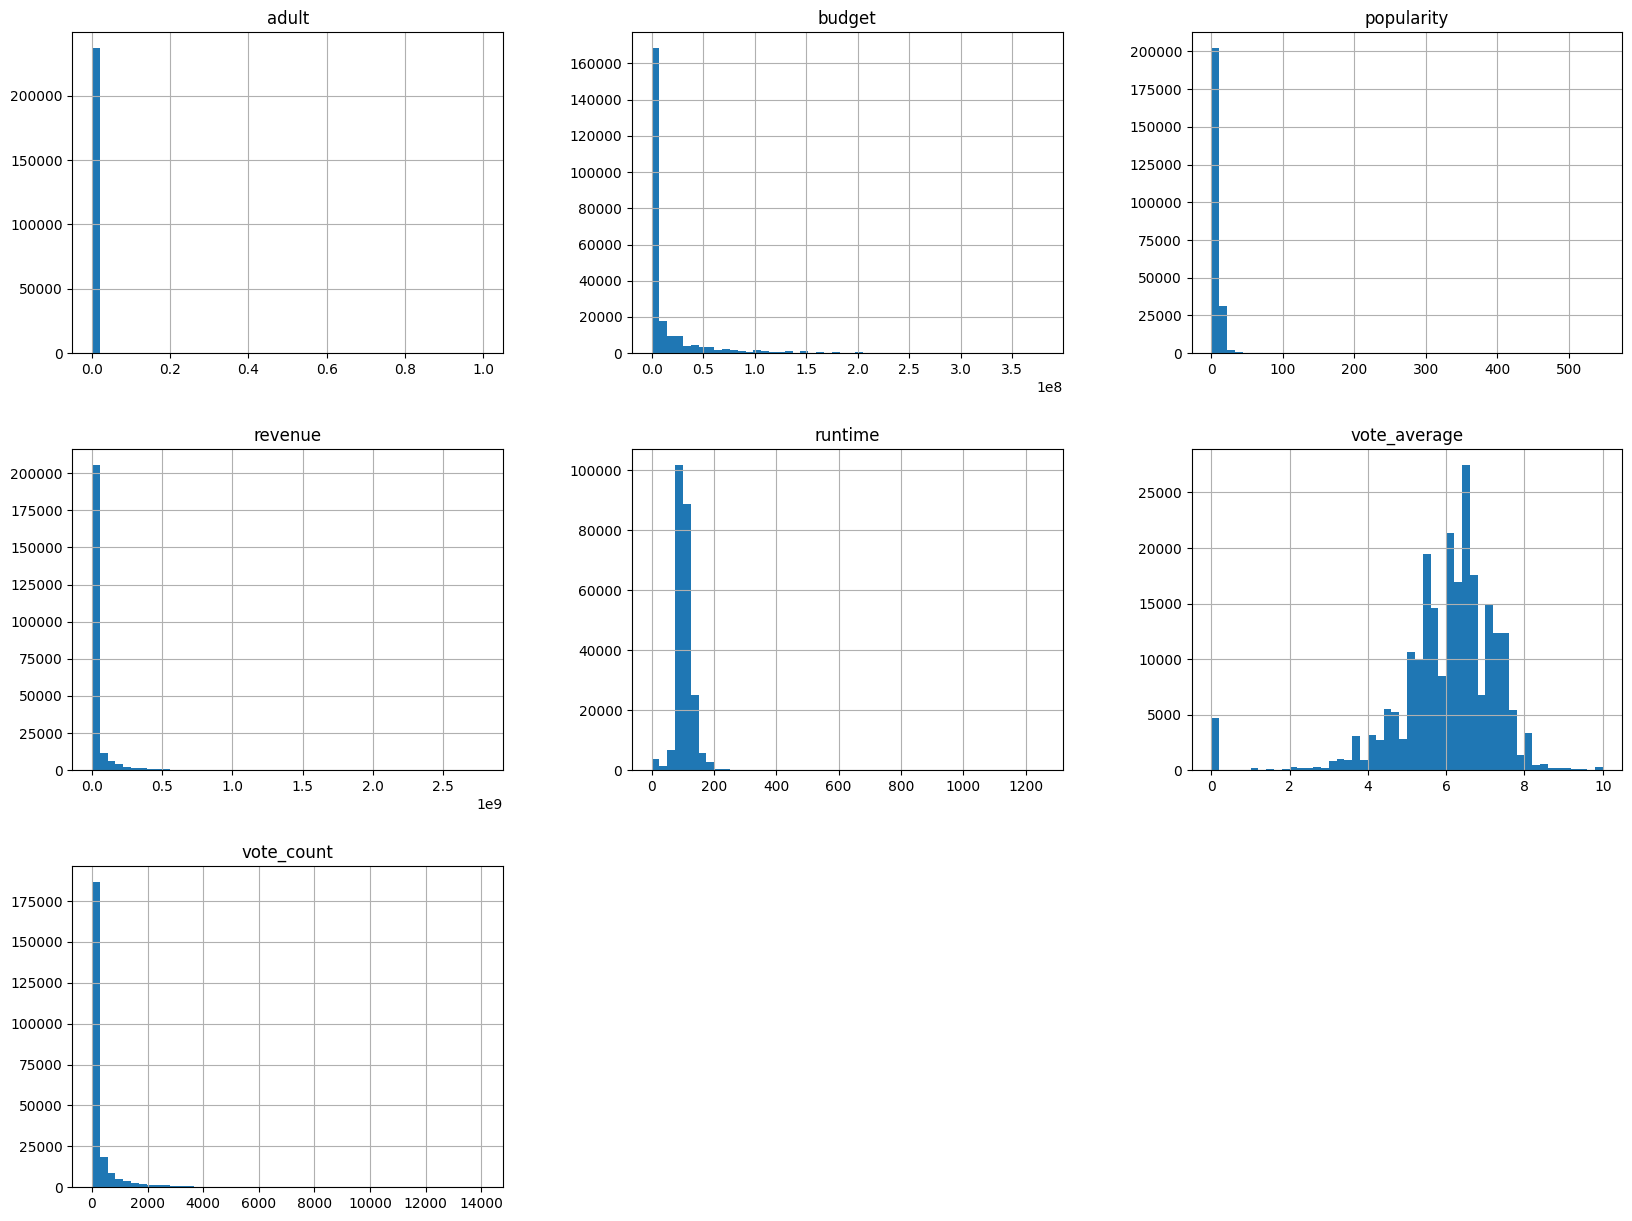

In [38]:
movies_df.hist(bins=50, figsize=(20,15))
plt.show()

##### Transform

In [39]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [40]:
num_attribs = ['adult', 'budget', 'runtime', 'popularity', 'vote_average', 'vote_count']
cat_attribs = ['genres', 'production_companies', 'production_countries']

In [41]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs), 
        ("cat", OneHotEncoder(), cat_attribs), 
    ])

## Splitting into train, val, and test

In [42]:
X = movies_df[['adult', 'budget', 'runtime', 'popularity',
               'vote_average', 'vote_count', 'genres', 
               'production_companies', 'production_countries']]
y = movies_df['revenue']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#### Linear Regression model

In [48]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [56]:
X_val_prepared = full_pipeline.transform(X_val)

In [57]:
print("Predictions: ", lin_reg.predict(X_val_prepared))

ValueError: X has 13709 features, but LinearRegression is expecting 21029 features as input.